In [2]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic

# PassengerId: 승객의 고유 식별자.
# Survived: 생존 여부 (0: 사망, 1: 생존).
# Pclass: 티켓의 클래스 또는 객실 등급 (1, 2, 3).
# Name: 승객의 이름.
# Sex: 성별 (male 또는 female).
# Age: 승객의 나이.
# SibSp: 함께 탑승한 형제자매 또는 배우자의 수.
# Parch: 함께 탑승한 부모 또는 자녀의 수.
# Ticket: 티켓 번호.
# Fare: 지불한 운임 요금.
# Cabin: 객실 번호.
# Embarked: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton).

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.to_csv('data/titanic.csv', index = False)

In [4]:
## 경고 메세지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

##### 데이터 전처리

In [5]:
## 결측값 확인

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
## age변수를 중앙값으로 치환

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
## embarked 열의 결측값을 최빈값으로 치환하기
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [10]:
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
## embark_town 열의 결측값을 최빈값으로 치환하기
titanic['embark_town'].value_counts()


Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [12]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [13]:
## deck 열의 결측값을 최빈값으로 치환하기
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [14]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
titanic.survived.value_counts()   ## 생존 인원 수

0    549
1    342
Name: survived, dtype: int64

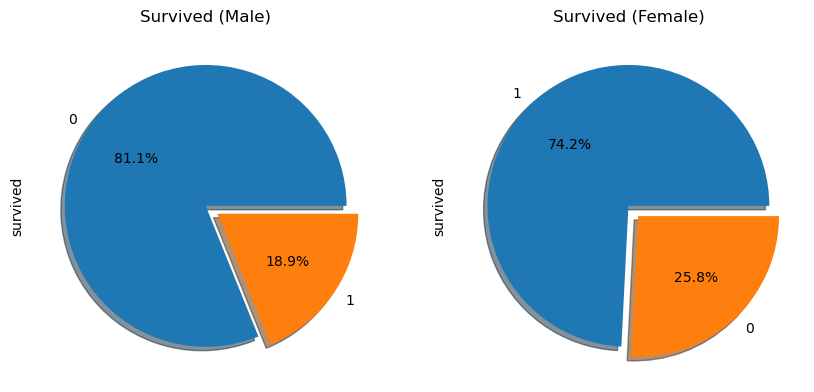

In [17]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax = ax[0], shadow = True)
                # 남성 승객의 생존률
                # explode = [0,0.1] : 두번째 조각의 돌출 정도(0~1사이값)
            
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax = ax[1], shadow = True)
                # 여성 승객의 생존률
        
ax[0].set_title('Survived (Male)')    # 첫번째 차트의 제목
ax[1].set_title('Survived (Female)')  # 두번째 차트의 제목

plt.show()

In [18]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


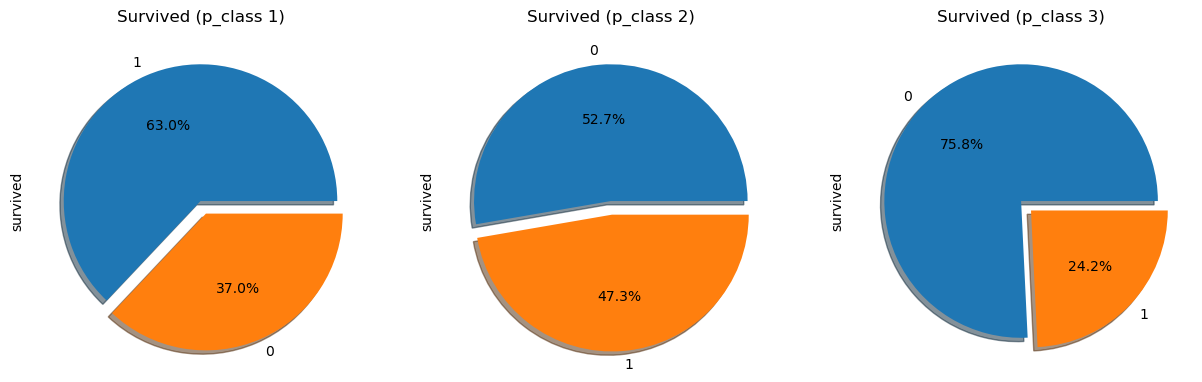

In [20]:
import matplotlib.pyplot as plt
#subplot(행 개수, 열 개수)

f,ax = plt.subplots(1, 3, figsize = (15, 5))
titanic['survived'][titanic['pclass'] == 1].value_counts().plot.pie(explode = [0,0.1], 
        autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['pclass'] == 2].value_counts().plot.pie(explode = [0,0.1], 
        autopct = '%1.1f%%', ax = ax[1], shadow = True)
titanic['survived'][titanic['pclass'] == 3].value_counts().plot.pie(explode = [0,0.1], 
        autopct = '%1.1f%%', ax = ax[2], shadow = True)



ax[0].set_title('Survived (p_class 1)')
ax[1].set_title('Survived (p_class 2)')
ax[2].set_title('Survived (p_class 3)')
plt.show()

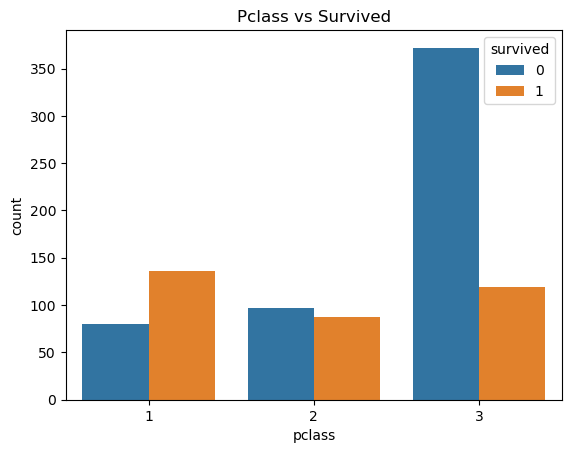

In [21]:
import seaborn as sns

sns.countplot(x='pclass', hue = 'survived', data = titanic) 
                    # pclass유형 1,2,3을 x축으로, survived의 각 개수를 y축으로
                    # countplot : 범주형 데이터의 빈도를 막대 그래프로 시각화

plt.title('Pclass vs Survived')
plt.show()

Text(0.5, 1.0, 'Sex vs Survived')

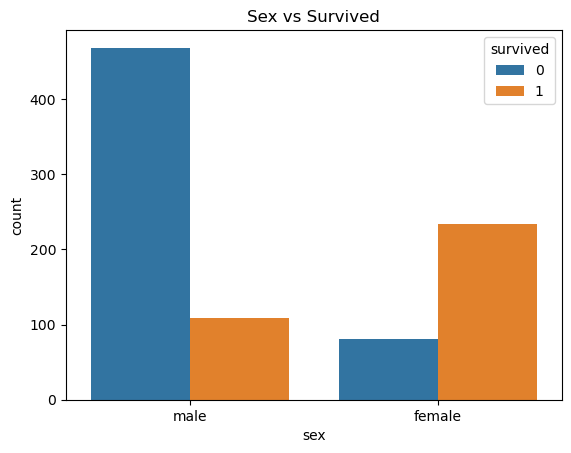

In [23]:
import seaborn as sns

sns.countplot(x='sex', hue = 'survived', data = titanic)
        
plt.title('Sex vs Survived')

### 데이터 모델링

In [26]:
## 상관 계수 구하기

## titanic_corr = titanic.corr(method = 'pearson')

titanic_corr = titanic.corr(numeric_only=True)
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [31]:
titanic_corr.to_csv('titanic_corr.csv', index = False)

In [32]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

#### 시각화

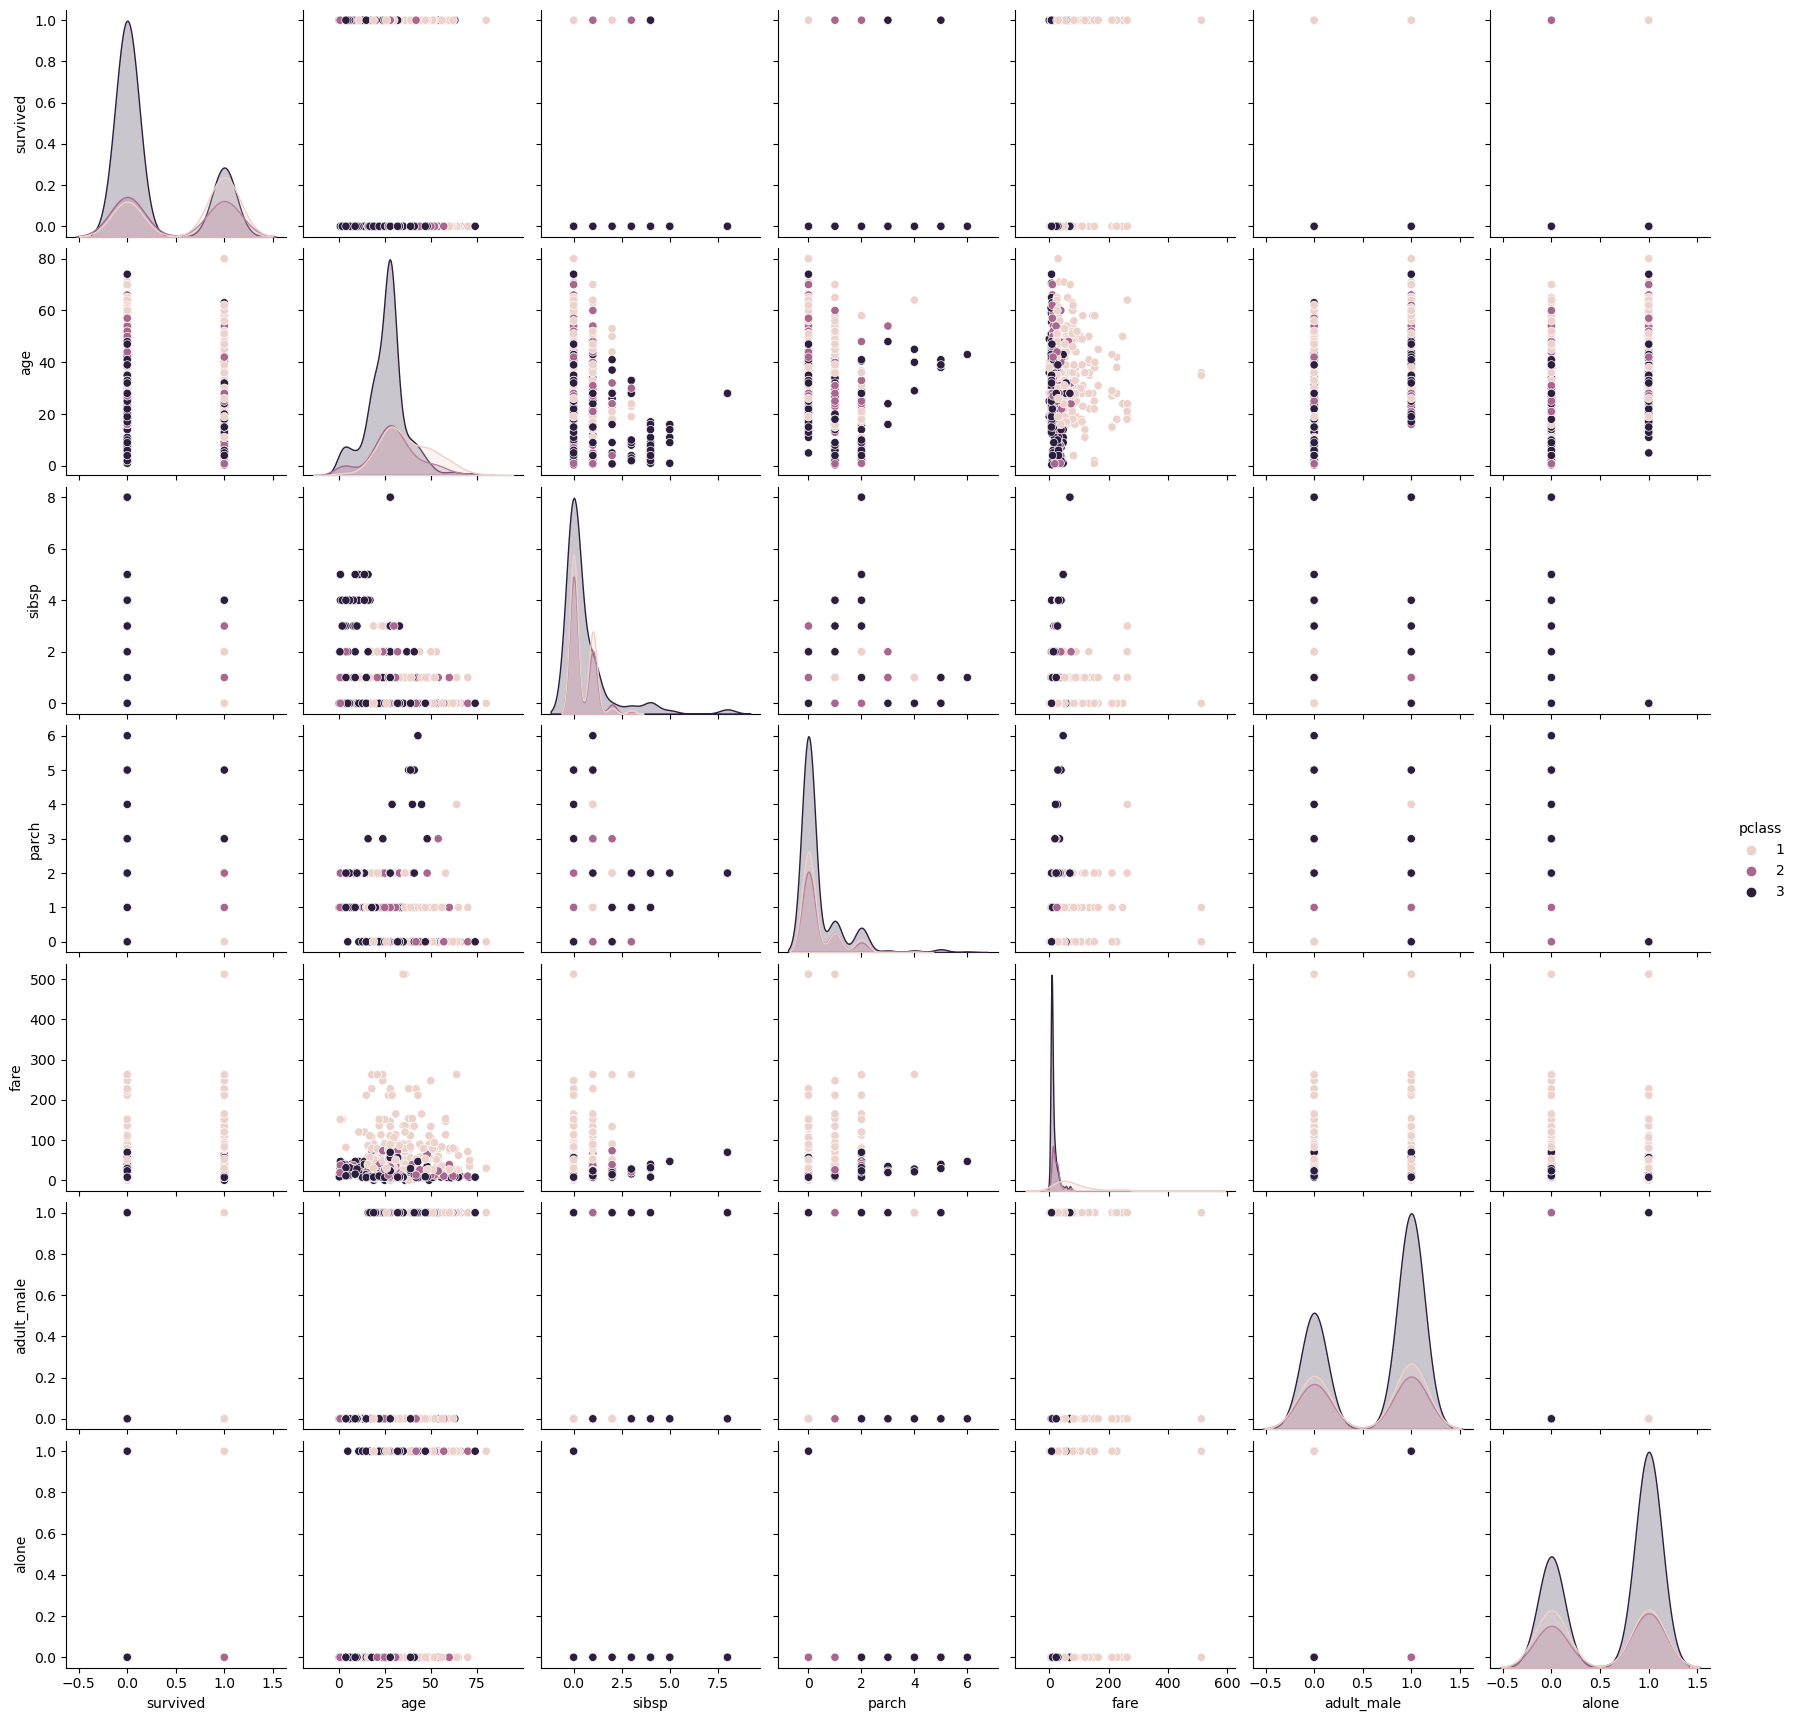

In [36]:
## 산점도

sns.pairplot(titanic, hue = 'pclass')

plt.show()

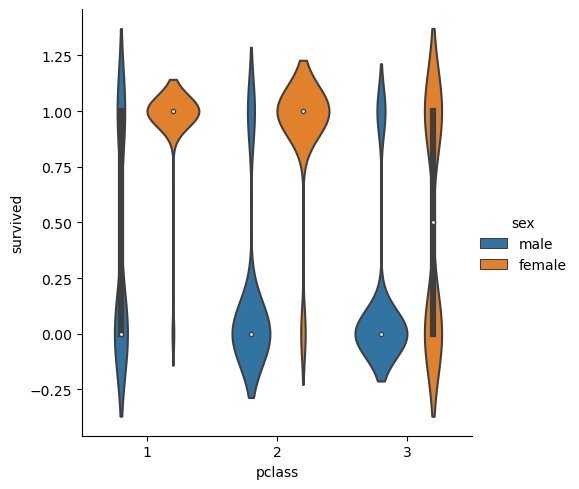

In [42]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'violin')  
# 범주형 데이터를 시각화
# catplot : 범주형 변수들 간의 관계를 확인할 때 활용
# pclass를 x축, survived를 y축으로 설정하고, 성별에 따라 다른 색상으로 점을 
#  찍어 각 클래스와 생존 여부에 대한 관계를 시각화

### kind = 'point' : point 대신, swarm, violin, bar 등을 사용할 수 있다.

plt.show()

In [44]:
## 히트맵

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [46]:
titanic['age2'] = titanic['age'].apply(category_age)  
## 함수를 사용하여 새로운 age2를 추가

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [47]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0}) # 성별을 1,0 으로
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [49]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1  
# 가족의 수를 구하여 family열 추가

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [50]:
titanic.to_csv('titanic3.csv', index = False)

In [51]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]  
# 히트맵에 사용할 데이터 추출

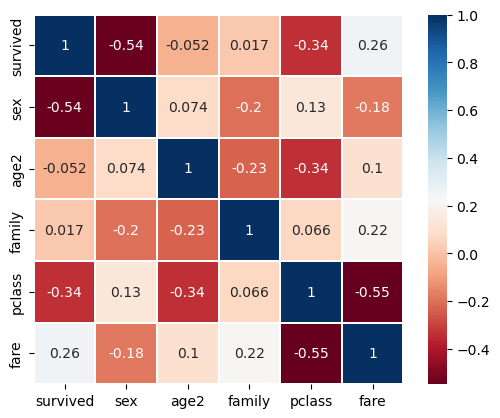

In [54]:
colormap = plt.cm.RdBu  # 컬러 맵

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, square = True, 
                                cmap = colormap, linecolor = 'white', annot = True)

plt.show()

###### 1.  mpg  데이터셋을 판다스로 읽어온다.

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mpg_data = sns.load_dataset("mpg")
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


###### 2. 데이터 기본 정보 확인하기

In [59]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


###### 3. 결측치 확인

In [60]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

###### 4. 결측치 처리 (평균값으로 대체)

In [62]:
 mpg_data['horsepower'].fillna(mpg_data['horsepower'].mean(), inplace=True)

In [63]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [64]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


###### 5. 범주형 데이터(origin)를 숫자로 변환    {'usa': 0, 'europe': 1, 'japan': 2}

In [91]:
mpg_data['origin_encoded']=mpg_data['origin'].map({'usa': 0, 'europe': 1, 'japan': 2})
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0


###### 6. ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'] 항목만 선택하여 변수에 저장


In [92]:
subset = mpg_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]

###### 7. 데이터 표준화

In [93]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
subset_st = scaler.fit_transform(subset.drop(['mpg'], axis=1))

subset_st


array([[ 1.49819126,  1.0906037 ,  0.66413273, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.57459447, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.18439658, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53247413, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66254009, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58450051, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [89]:
# 표준화된 데이터를 판다스 데이터프레임으로 변환
subset_st_df = pd.DataFrame(subset_st, columns=subset.columns[1:])
subset_st_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,-0.715145


###### 8. 상관분석

In [86]:
corr_matrix = subset_st_df.corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
cylinders,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model_year,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin_encoded,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


###### 9. 히트맵 그리기

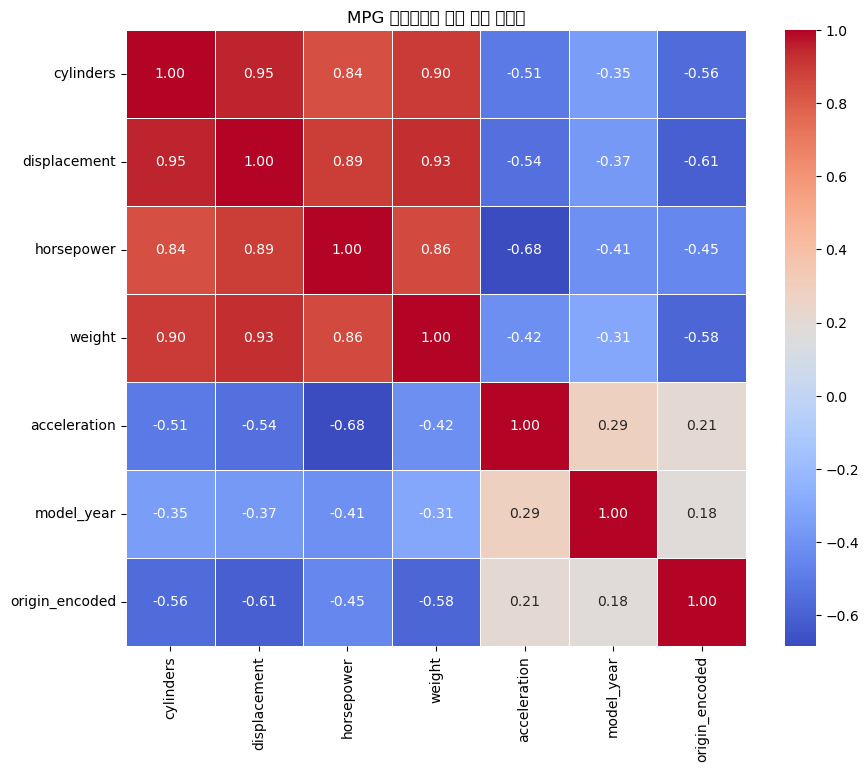

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('MPG 데이터셋의 상관 관계 히트맵')
plt.show()

###### tips 데이터셋 이용

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [115]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###### 1. 기본 정보 확인

In [116]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


###### 2. 결측치 확인 (개수)

In [117]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

###### 3. 수치형 변수들만 선택하여 num 변수에 저장하기

In [118]:
num = ['total_bill', 'tip', 'size']

###### 4. 결측치 처리 (평균값으로 처리하기)

In [119]:
tips[num] = tips[num].fillna(tips[num].mean())
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


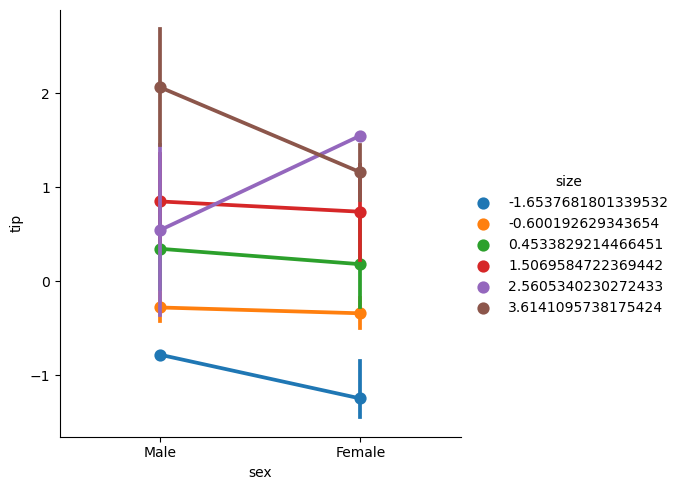

In [128]:
sns.catplot(x = 'sex', y = 'tip', hue = 'size', data = tips, kind = 'point')

###### 5. 수치형 변수들을 표준화

In [120]:
scaler = StandardScaler()
tips[num] = scaler.fit_transform(tips[num])
tips

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193


###### 6. 범주형 데이터들을 수치형으로 변환(sex, smoker, day, time)

In [121]:
col = ['sex', 'smoker', 'day', 'time']

for r in col:
    tips[r + '_encoded'] = pd.Categorical(tips[r]).codes

    ##  pd.Categorical : 리스트에 포함된 범주형 변수들을 더미 인코딩으로 변환

tips  

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193,1,1,3,1
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383,0,1,3,1
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383,0,1,3,1
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193,0,1,3,1
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383,0,1,2,1
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193,1,0,2,1
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193,0,0,2,1
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193,0,1,2,1


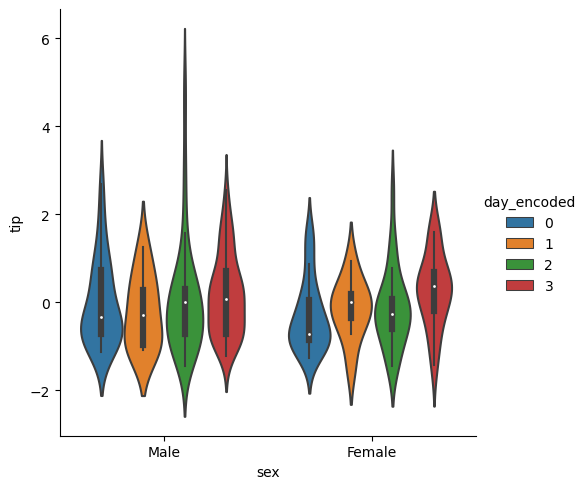

In [133]:
sns.catplot(x = 'sex', y = 'tip', hue = 'day_encoded', data = tips, kind = 'violin')

In [122]:
# tips['sex'] = tips['sex'].map({'Male':0, 'Female':1})
# tips['smoker'] = tips['smoker'].map({'No':0, 'Yes':1})
# tips['day'] = tips['day'].map({'Sun':0, 'Thur':1, 'Fri':2, 'Sat':3})
# tips['time'] = tips['time'].map({'Dinner':0, 'Lunch':1})
# tips

###### 7. 상관분석(상관계수)

In [123]:
corr_matrix = tips.corr()   ###  tips.corr(numeric_only=True)
corr_matrix

,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,0.173693,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,0.135499,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,0.165350,0.103411
sex_encoded,-0.144877,-0.088862,-0.086195,1.000000,0.002816,-0.230791,-0.205231
smoker_encoded,-0.085721,-0.005929,0.133178,0.002816,1.000000,0.032653,-0.054921
day_encoded,0.173693,0.135499,0.165350,-0.230791,0.032653,1.000000,0.874366
time_encoded,0.183118,0.121629,0.103411,-0.205231,-0.054921,0.874366,1.000000


In [124]:
sns.catplot(x = 'total_bill', y = 'tip', hue = 'sex_encoded	', data = titanic, kind = 'point')

ValueError: Could not interpret input 'total_bill'

###### 8. 히트맵 그리기

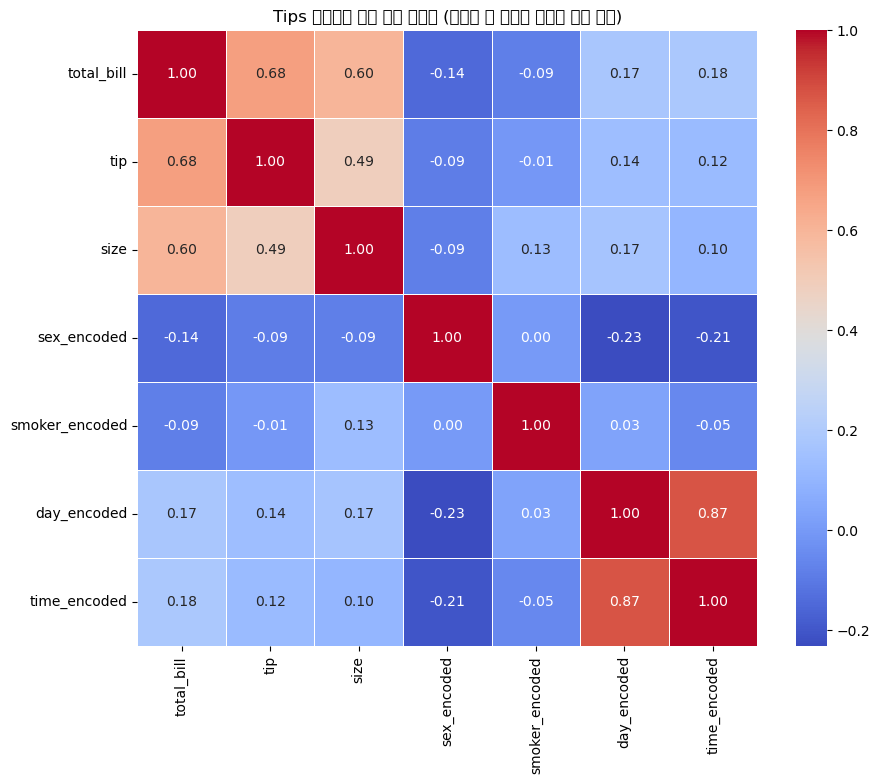

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Tips 데이터의 상관 관계 히트맵 (표준화 및 범주형 데이터 변환 포함)')
plt.show()
